In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots
plt.style.use(["science","bright","grid"])

In [2]:
freq_vals   = [0.001,0.002,0.004,0.006,0.008,0.01,0.03,0.06,0.12,0.25,0.5,1.,2.,5.,6.,8.,10.,12.,15.,18.,23.,28.,36.,44.,55.,68.,86.,105.,133.]
ms          = ['o','s','P','^','v']
C_vals      = ["1e1","5e2","5e3","5e4","5e5"]
thd_out     = {C : np.load("data/thd_out_C_"+C+".npy") for C in C_vals}
thd_net     = {C : pd.DataFrame(np.load("data/thd_vals_C_"+C+".npy"),index=freq_vals) for C in C_vals}

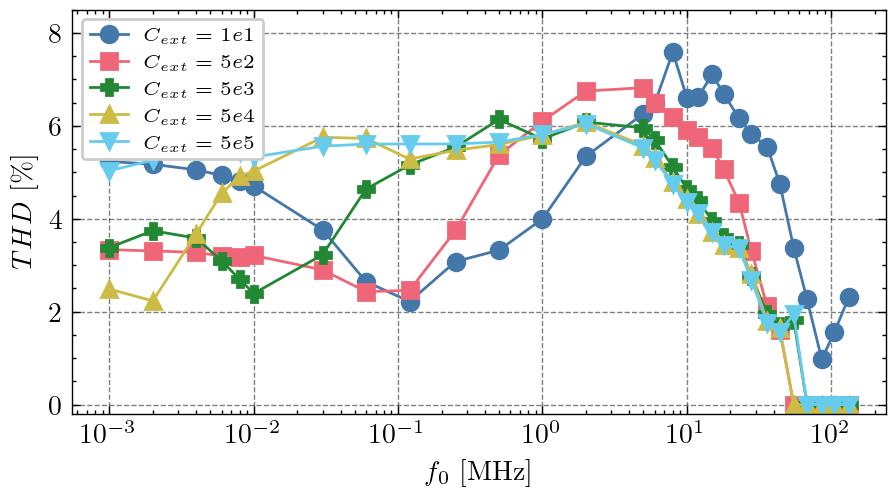

In [3]:
fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*1.5)
ax  = fig.add_subplot()
for i, C in enumerate(C_vals):
    ax.plot(freq_vals, thd_out[C], label='$C_{ext} = '+C+'$', marker=ms[i])
ax.set_ylabel('$THD$ [\%]')
ax.set_xlabel('$f_0$ [MHz]')
ax.legend(fontsize='x-small', loc='upper left')
ax.set_xscale('log')
ax.set_ylim(-0.2,8.5)
fig.savefig("plots/thd_output_vs_freq.svg", transparent=True)

In [12]:
df = pd.DataFrame()
for i, C in enumerate(C_vals):
    df_melted       = thd_net[C].reset_index().melt(id_vars='index')
    df_melted['C']  = C
    df              = pd.concat([df,df_melted]).reset_index(drop=True)
df

,index,variable,value,C
0,0.001,0,6.233037,1e1
1,0.002,0,6.188328,1e1
2,0.004,0,6.099409,1e1
3,0.006,0,6.018871,1e1
4,0.008,0,5.930957,1e1
...,...,...,...,...
11740,55.000,80,2.436465,5e5
11741,68.000,80,1.384690,5e5
11742,86.000,80,1.339591,5e5
11743,105.000,80,1.797972,5e5


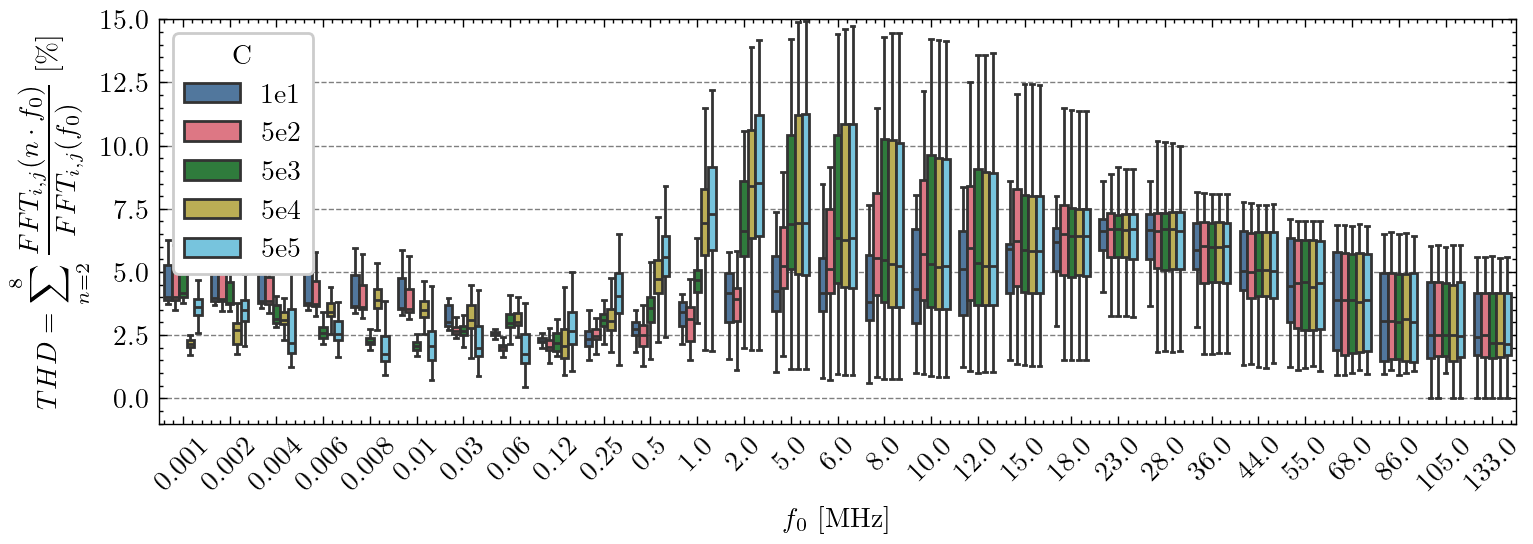

In [13]:
fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2.5)
ax  = fig.add_subplot()
ax  = sns.boxplot(data=df, x='index', y='value', hue='C', fliersize=0)
ax.set_ylim(0,10)
ax.set_ylabel("$THD = \displaystyle\sum_{n=2}^{8}\\frac{FFT_{i,j}(n \cdot f_0)}{FFT_{i,j}(f_0)}$ [\%]")
ax.set_xlabel("$f_0$ [MHz]")
ax.set_ylim(-1,15)
_ = plt.xticks(rotation=45)
# fig.savefig("../plots/ac_input/2_electrodes/thd_dists_vs_freq.svg", transparent=True)

In [15]:
df_metled = thd_net['1e1'].melt()